In [1781]:
# Let's import the libraries needed for data manipulation
# numpy and pandas, matplotlib, seaborn
# We'll increase display width so we can scroll through all the columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [1782]:
df = pd.read_csv('camera_dataset.csv')
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024,640,0,38,114,70,40.0,4.0,420.0,95.0,179
1,Agfa ePhoto 1680,1998,1280,640,1,38,114,50,0.0,4.0,420.0,158.0,179
2,Agfa ePhoto CL18,2000,640,480,0,45,45,0,0.0,2.0,0.0,0.0,179
3,Agfa ePhoto CL30,1999,1152,640,0,35,35,0,0.0,4.0,0.0,0.0,269
4,Agfa ePhoto CL30 Clik!,1999,1152,640,0,43,43,50,0.0,40.0,300.0,128.0,1299


In [1783]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Release date,1038.0,2003.590559,2.724755,1994.0,2002.0,2004.0,2006.0,2007.0
Max resolution,1038.0,2474.672447,759.513608,0.0,2048.0,2560.0,3072.0,5616.0
Low resolution,1038.0,1774.398844,830.042866,0.0,1120.0,2048.0,2560.0,4992.0
Effective pixels,1038.0,4.596339,2.844044,0.0,3.0,4.0,7.0,21.0
Zoom wide (W),1038.0,32.963391,10.333149,0.0,35.0,36.0,38.0,52.0
Zoom tele (T),1038.0,121.525048,93.455422,0.0,96.0,108.0,117.0,518.0
Normal focus range,1038.0,44.145472,24.141959,0.0,30.0,50.0,60.0,120.0
Macro focus range,1037.0,7.787850,8.100081,0.0,3.0,6.0,10.0,85.0
Storage included,1036.0,17.447876,27.440655,0.0,8.0,16.0,20.0,450.0
Weight (inc. batteries),1036.0,319.265444,260.410137,0.0,180.0,226.0,350.0,1860.0


We can see from looking at the data here, we have release date, resolution, pixels, zoom, focus range, storage, weight, dimensions and price for the cameras.

##### There seem to be a lot of zeros in the data. Let's evaluate this to see if it makes sense:
* <font color=red>Max/Low resolution - these don't make sense to be 0 but we could impute these using each other, so let's set them to NaN</font>
* Effective pixels - these could be 0
* Macro/normal focus range/zoom tele/zoom wide - these could be 0 if there's no lens included
* Storage included - this could be 0 if there's no internal memory
* <font color=red>Dimensions/Weight: 0 dimensions or weight don't make sense, so we'll mark these as NaN instead for now</font>

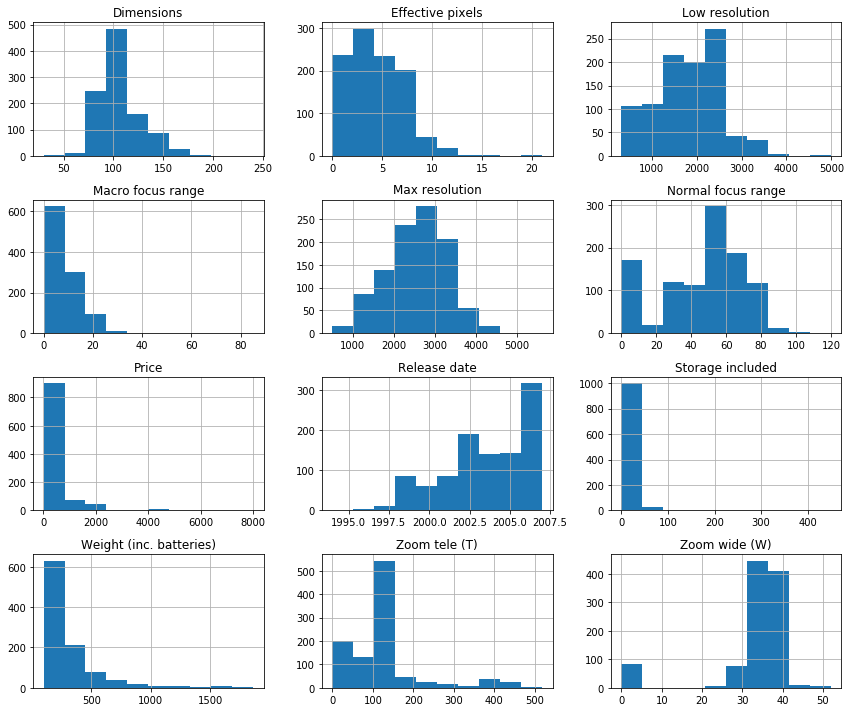

In [1784]:
# Let's look at histograms after changing 0 to NaN for dimensions, weight and resolution
for col in ['Dimensions','Weight (inc. batteries)','Max resolution','Low resolution']:
    df[col].replace(0,np.nan,inplace=True)
df.hist(figsize=(12,10))
plt.tight_layout()

We can see a lot of non-normal data here.

#### Question 1: What has changed over the years for cameras?

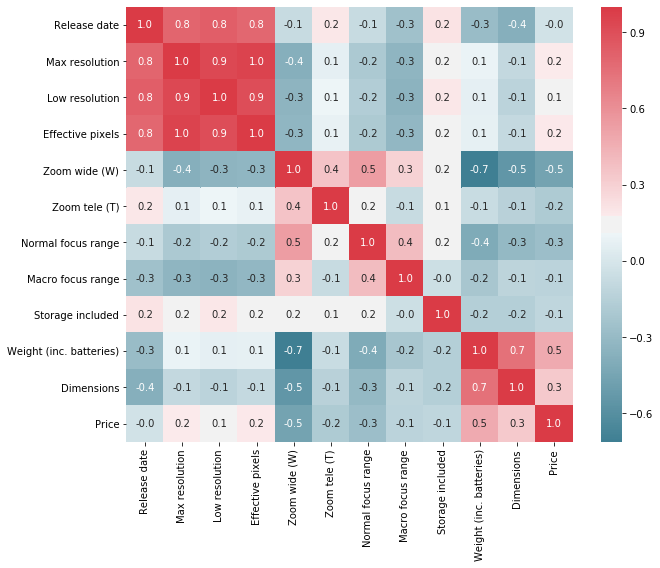

In [1785]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap=cmap)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

As we can see from the correlation matrix above, max resolution, low resolution and effective pixels correlate highly with Release Date. These have increased over the years, let's explore this further

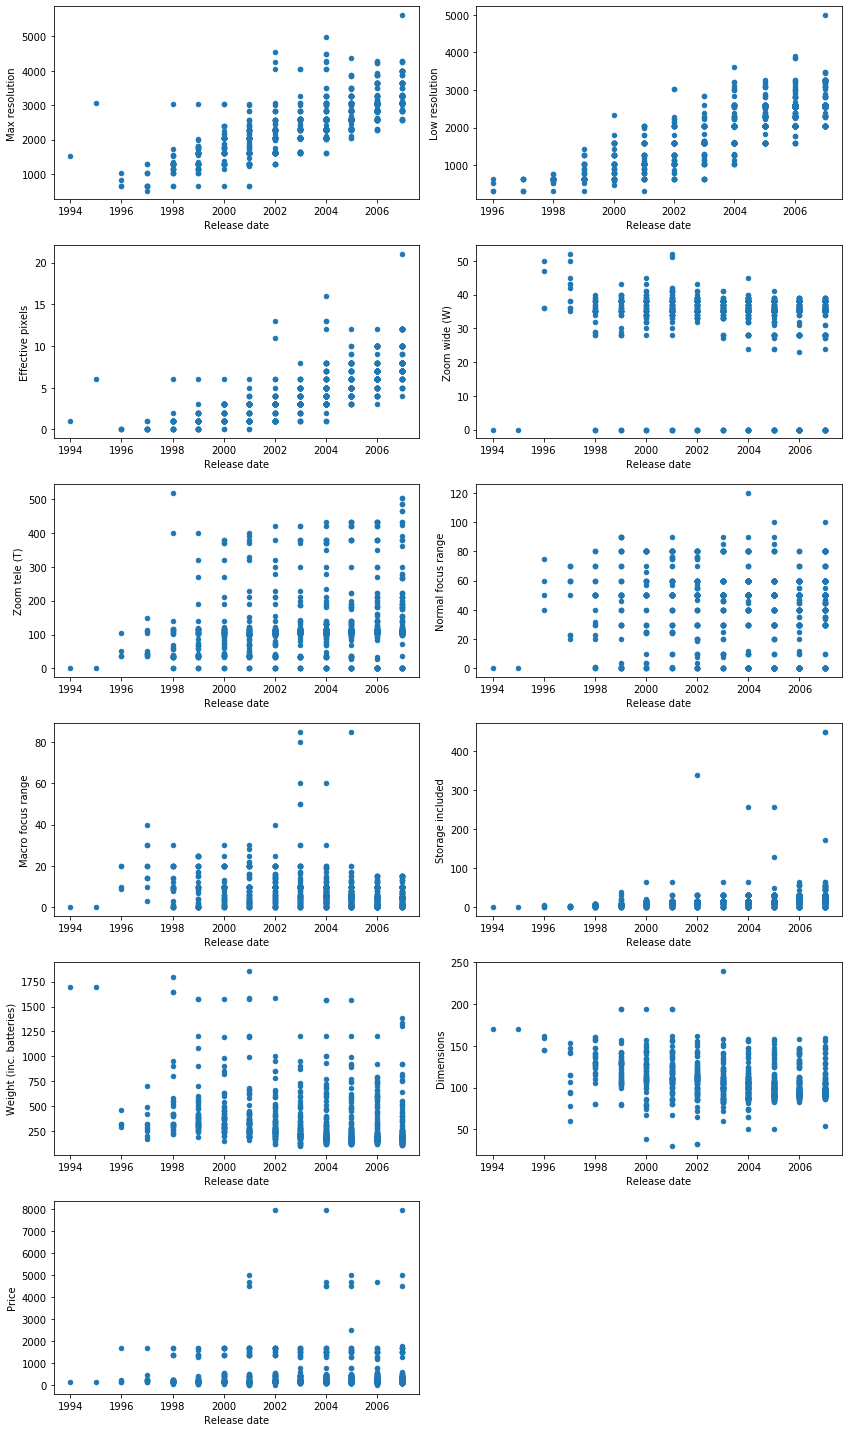

In [1786]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,20))
axes_list = [item for sublist in axes for item in sublist] 

for col in df.drop(columns=['Model','Release date']).columns:
    ax = axes_list.pop(0)
    df.plot.scatter('Release date', col, ax=ax)

plt.tight_layout()

# delete anything we didn't use
for ax in axes_list:
    ax.remove()

From the above charts, we can see that resolution and effective pixels have increased over time for the cameras as seen in the correlation matrix. It also seems that there are more high-end models available since 2001.

#### Question 2: How much do the prices of cameras vary?

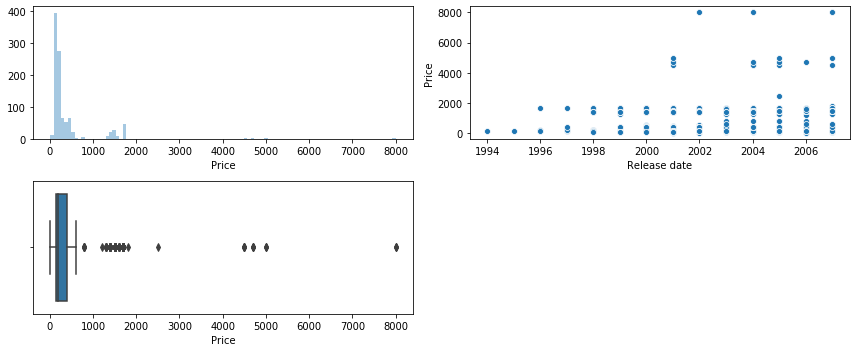

In [1787]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
sns.distplot(df['Price'],ax=axes[0,0],kde=False,bins=100,)
sns.scatterplot(x='Release date', y='Price', data=df, ax=axes[0,1])
sns.boxplot(x='Price', data=df, ax=axes[1,0])
axes[1,1].remove()
plt.tight_layout()
plt.show()

We can see from the charts above that there's multiple price points for cameras with the low end being less than  \\$1000, next one between \\$1000 and \\$2000, then some (very few) around \\$5000 and \\$8000. We can also see from the distribution plot above that the price distribution for these cameras is a right-tailed distruibution with many outliers.

In [1788]:
df['Price'].describe().round()

count    1038.0
mean      457.0
std       760.0
min        14.0
25%       149.0
50%       199.0
75%       399.0
max      7999.0
Name: Price, dtype: float64

The median for the camera prices is \\$199 , 75\% of the cameras are less than \\$399.

In [1789]:
print('{:.2f}% of cameras are more than $2000'.format(df[df['Price']>2000]['Price'].count()/df.shape[0]*100))
print('{:.2f}% of cameras are more than $1000'.format(df[df['Price']>1000]['Price'].count()/df.shape[0]*100))

1.54% of cameras are more than $2000
13.29% of cameras are more than $1000


So, the prices of cameras vary quite a bit, but most of them are less than \\$1000

#### Question 3: What is special about the high-end cameras?

There really aren't enough high-end cameras in this dataset to make any clear conclusions about the differences, but we'll try to see if we can see any differnces between cameras less than \\$1000 vs. greater than \\$1000.

In [1790]:
# Let's look at how many NaN values exist for each column
print('Percentage of missing values by column')
for col in df.columns:
    print('{}: {:.1f}%'.format(col,df[df[col].isnull()].count()[0]/df.shape[0]*100))

# Rows where there's at least one NaN value
print('\n{} out of {} contain at least one NaN value'.format(df[df.isnull().any(axis=1)].shape[0],df.shape[0]))

Percentage of missing values by column
Model: 0.0%
Release date: 0.0%
Max resolution: 0.1%
Low resolution: 5.1%
Effective pixels: 0.0%
Zoom wide (W): 0.0%
Zoom tele (T): 0.0%
Normal focus range: 0.0%
Macro focus range: 0.1%
Storage included: 0.2%
Weight (inc. batteries): 2.2%
Dimensions: 1.5%
Price: 0.0%

77 out of 1038 contain at least one NaN value


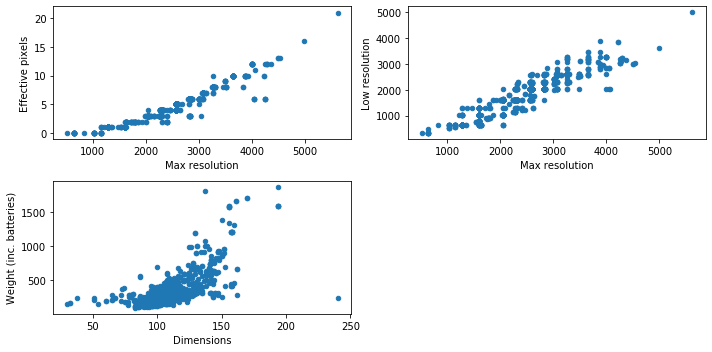

In [1791]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
df.plot.scatter('Max resolution', 'Effective pixels',ax=axes[0,0])
df.plot.scatter('Max resolution', 'Low resolution',ax=axes[0,1])
df.plot.scatter('Dimensions', 'Weight (inc. batteries)',ax=axes[1,0])
axes[1,1].remove()
plt.tight_layout()
plt.show()

We can see from the scatter plots above that pixels, max resolution and low resolution are correlated which makes sense. Weight and dimensions also show a non-linear correlation.

In [1792]:
# We'll add columns to list the brand and product family of the cameras
df['Brand'] = df['Model'].apply(lambda x:x.split()[0])
df['Family']=df['Model'].str.extract(r'[\s|-]([a-zA-Z]*)')

Let's try to impute some values now, first we'll impute weight and dimensions using means of product family for the brand

In [1793]:
def impute_by_group(col,group_cols,df):
    '''
    Input
    col - column to impute
    group_cols - list of cols that are to be used to group the data for calculating means
    df - dataframe
    
    Output - column after NaN values are imputed
    '''
    return df.groupby(group_cols)[col].transform(lambda x:x.fillna(x.mean()))

group_cols = ['Brand','Family']
df['Dimensions'] = impute_by_group('Dimensions', group_cols, df)
df['Weight (inc. batteries)'] =  impute_by_group('Weight (inc. batteries)', group_cols, df)


Next, let's impute low resolution by using a linear model based on max resolution

In [1794]:
def impute_by_linear_model(col,xcol,df):
    '''
    Input
    col - y column to impute
    xcol - x column to be used for linear model
    df - dataframe
    
    Output - column after NaN values are imputed
    '''
    from sklearn.linear_model import LinearRegression

    df_train = df.dropna()
    lm = LinearRegression()
    lm.fit(np.array(df_train[xcol]).reshape(-1,1),df_train[col])
    coef,inter = lm.coef_[0], lm.intercept_

    return df.apply(lambda x:(inter + coef*x[xcol]) if pd.isnull(x[col]) else x[col], axis=1)

df['Low resolution'] = impute_by_linear_model('Low resolution','Max resolution',df)

In [1796]:
# Let's look at what else is left
df[df.isnull().any(axis=1)]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Brand,Family
185,Contax N Digital,2000,3040.0,2369.242836,6,0,0,0,0.0,0.0,NaN,152.000000,549,Contax,N
345,HP Photosmart R927,2006,3296.0,2592.000000,8,35,105,50,10.0,NaN,242.272727,109.772727,179,HP,Photosmart
346,HP Photosmart R937,2007,3298.0,2605.269497,8,39,118,50,NaN,NaN,242.272727,109.772727,179,HP,Photosmart
370,Kodak CX7220,2004,NaN,NaN,2,37,78,50,60.0,16.0,195.000000,104.000000,129,Kodak,CX


In [1797]:
# Since we only have 4 rows left with NaN, we'll drop these rows
df.dropna(inplace=True)

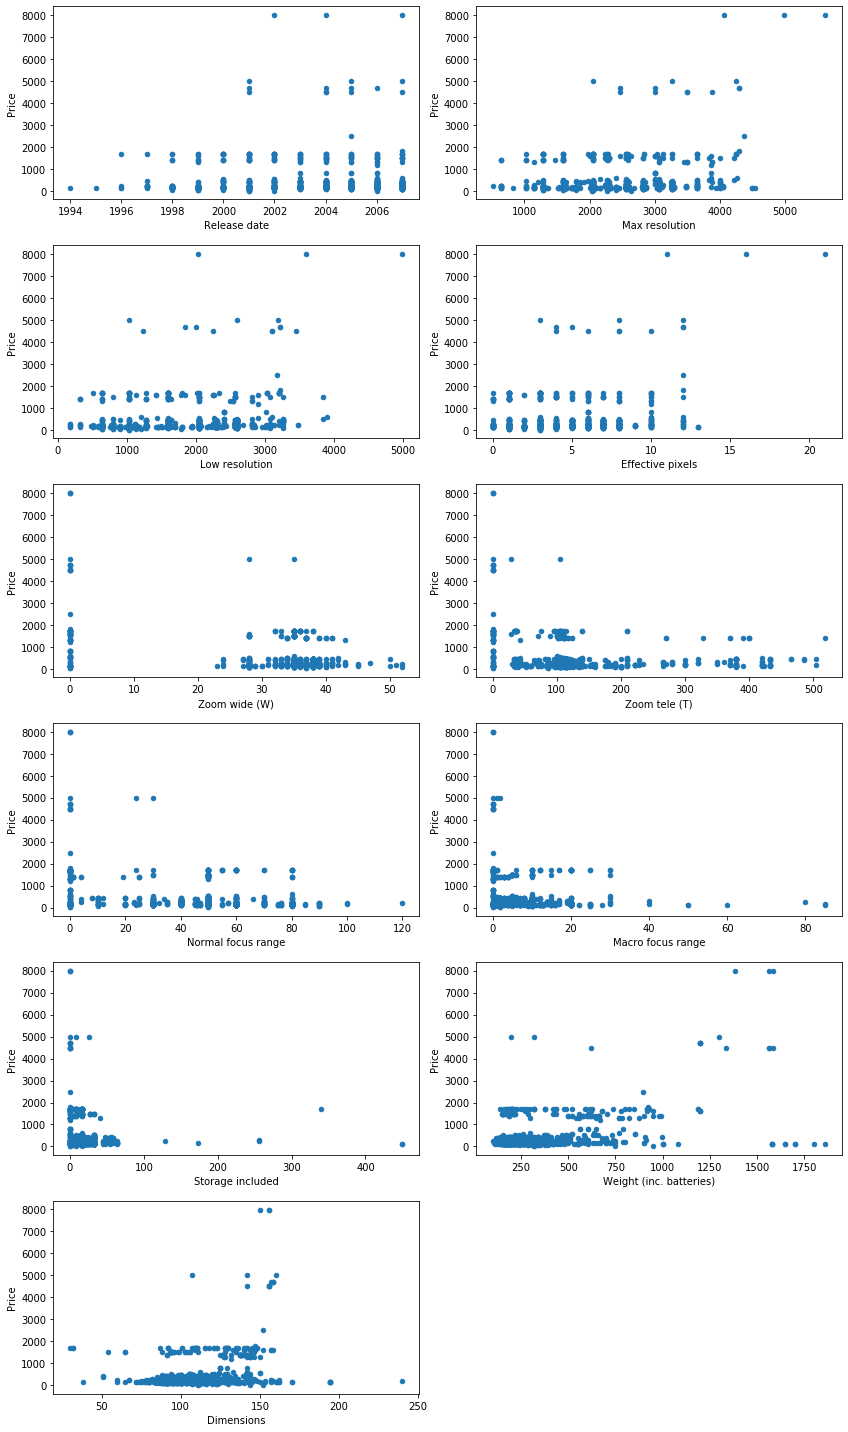

In [1799]:
# Let's look at price vs. feature scatterplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,20))
axes_list = [item for sublist in axes for item in sublist] 

for col in df.drop(columns=['Model','Price','Brand','Family']).columns:
    ax = axes_list.pop(0)
    df.plot.scatter(col, 'Price', ax=ax)

plt.tight_layout()

# delete anything we didn't use
for ax in axes_list:
    ax.remove()

In general, cameras more than \\$2000 were released after 2001, have higher resolution, tend not to come with a lens(thus, have zoom & normal range of 0) and tend to be bigger and heavier

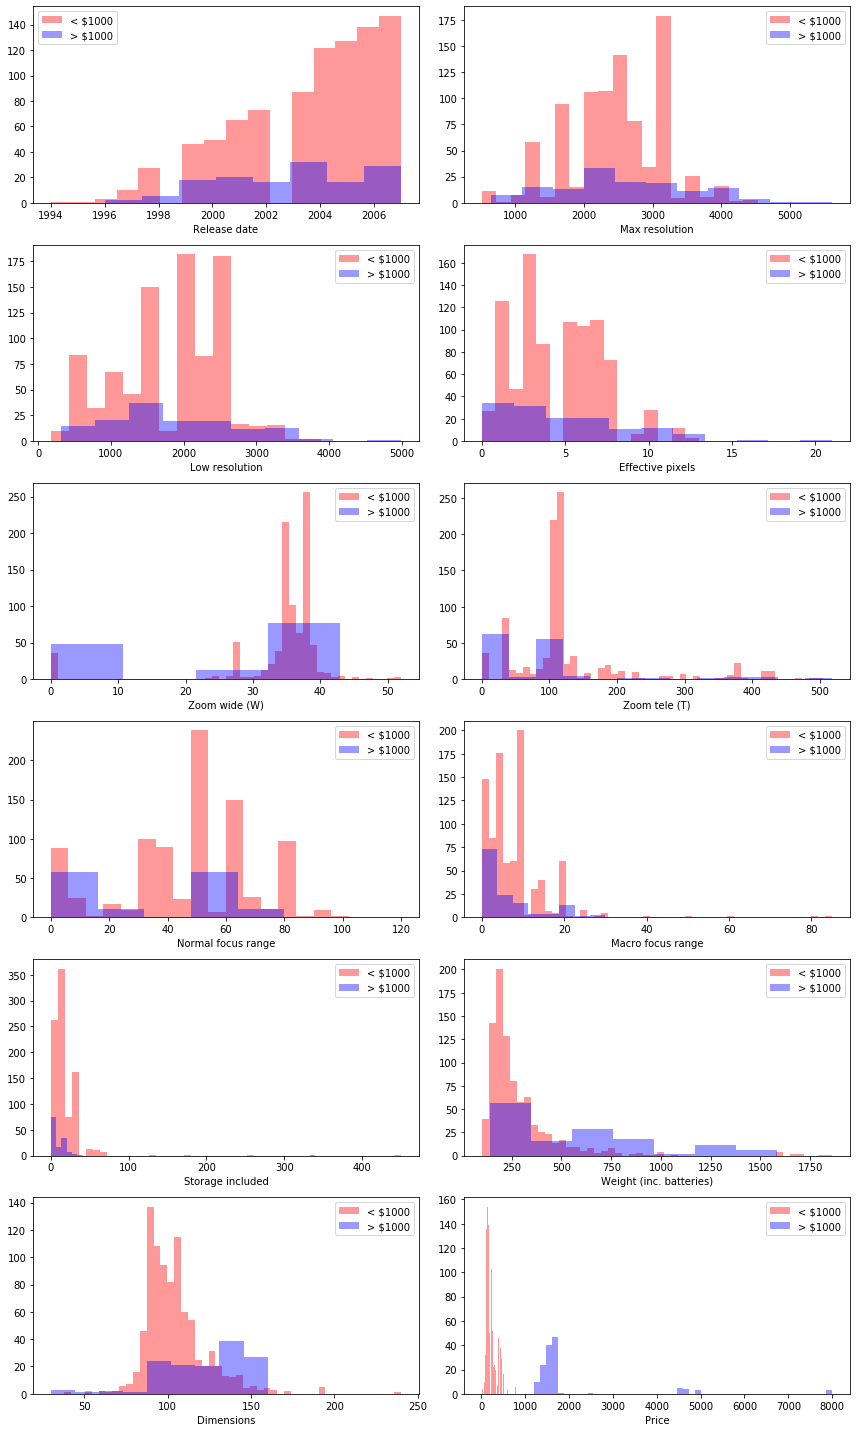

P-values for cameras less than $1000 vs. greater than $1000
Release date: 0.004, Means: 2003.68 vs. 2002.98
Max resolution: 0.315, Means: 2462.96 vs. 2552.67
Low resolution: 0.573, Means: 1846.35 vs. 1890.94
Effective pixels: 0.533, Means: 4.56 vs. 4.77
Zoom wide (W): 0.000, Means: 34.54 vs. 22.85
Zoom tele (T): 0.000, Means: 127.89 vs. 81.54
Normal focus range: 0.000, Means: 46.31 vs. 30.26
Macro focus range: 0.004, Means: 8.02 vs. 5.96
Storage included: 0.002, Means: 18.60 vs. 10.09
Weight (inc. batteries): 0.000, Means: 289.40 vs. 562.43
Dimensions: 0.000, Means: 104.45 vs. 123.18
Price: 0.000, Means: 225.30 vs. 1970.01


In [1800]:
import scipy

cols = df.drop(columns=['Model','Brand','Family']).columns

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,20))
axes_list = [item for sublist in axes for item in sublist] 

for col in cols:
    ax = axes_list.pop(0)
    sns.distplot(df[df['Price']<1000].dropna(subset=[col])[col],label='< $1000',ax=ax,color='red',kde=False)
    sns.distplot(df[df['Price']>=1000].dropna(subset=[col])[col],label='> $1000',ax=ax,color='blue',kde=False)
    ax.legend()
plt.tight_layout()
plt.show()

print('P-values for cameras less than $1000 vs. greater than $1000')
for col in cols:
    group1 = df[df['Price']<1000].dropna(subset=[col])[col]
    group2 = df[df['Price']>=1000].dropna(subset=[col])[col]
    print('{}: {:.3f}, Means: {:.2f} vs. {:.2f}'.format(col,
    scipy.stats.ttest_ind(group1,group2,equal_var=False)[1],group1.mean(),group2.mean()))

* There have been basically the same number of cameras over time that are greater than \\$1000 but there have been more and more cameras less than \\$1000 that are being released over time.
* The difference in max resolution, low resolution and effective pixels for these two groups is not statistically significant
* Zoom and focus range tend to be lower for higher end cameras, this may be because a lot of the high end cameras don't come with a lens and must be purchased separately
* Cameras greater than \\$1000 also have less internal storage
* Cameras greater than \\$1000 tend to be bigger and heavier


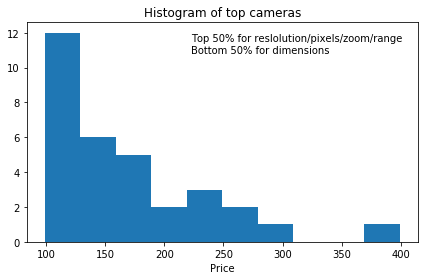

In [1838]:
top_cameras = df[(df['Max resolution']>df['Max resolution'].quantile(.50)) & 
   (df['Dimensions']<df['Dimensions'].quantile(0.5)) &
   (df['Effective pixels']>df['Effective pixels'].quantile(.50)) &
   (df['Zoom tele (T)']>df['Zoom tele (T)'].quantile(.50)) &
   (df['Zoom wide (W)']>df['Zoom wide (W)'].quantile(.50)) &
    (df['Normal focus range']>df['Normal focus range'].quantile(.50)) &
   (df['Macro focus range']>df['Macro focus range'].quantile(.50)) ].sort_values('Price',ascending=False)
top_cameras['Price'].hist(grid=False)
plt.xlabel('Price')
plt.title('Histogram of top cameras')
plt.figtext(0.45,0.8,'Top 50% for reslolution/pixels/zoom/range\nBottom 50% for dimensions')
plt.tight_layout()
plt.show()

Cameras that are in the top 50% for max resolution, effective pixels, zoom tele, zoom wide, normal focus range, macro focus range and in the bottom 50% for dimensions are all less than \\$400

In [1839]:
# Let's encode the categorical variable brand
df = pd.concat([df, pd.get_dummies(df['Brand'], drop_first=True)], axis=1)
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Brand,Family,Canon,Casio,Contax,Epson,Fujifilm,HP,JVC,Kodak,Kyocera,Leica,Nikon,Olympus,Panasonic,Pentax,Ricoh,Samsung,Sanyo,Sigma,Sony,Toshiba
0,Agfa ePhoto 1280,1997,1024.0,640.0,0,38,114,70,40.0,4.0,420.0,95.0,179,Agfa,ePhoto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1,38,114,50,0.0,4.0,420.0,158.0,179,Agfa,ePhoto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agfa ePhoto CL18,2000,640.0,480.0,0,45,45,0,0.0,2.0,352.5,125.0,179,Agfa,ePhoto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0,35,35,0,0.0,4.0,352.5,125.0,269,Agfa,ePhoto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0,43,43,50,0.0,40.0,300.0,128.0,1299,Agfa,ePhoto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1840]:
def calc_model(X,y,model='linear',depth=3,plot=True):
    '''
    Input
    mod - model to use (linear, dtree, gboost)
    Xcols - columns to be used as input
    ycol - response column
    df - datafram
    plot - whether to plot pred vs actual for model
    depth - to be used for decision tree and gradient boosting regressor
    
    '''
    from sklearn.model_selection import train_test_split  
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40) 
    
    if model == 'linear':
        reg = LinearRegression(normalize=True)
    elif model == 'dtree':
        reg = DecisionTreeRegressor(max_depth=depth)
    elif model == 'gboost':
        reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                max_depth=depth, random_state=10, loss='ls').fit(X_train, y_train)
    else:
        return
    
    reg.fit(X_train,y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)

    if plot==True:
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.scatter(y_test, y_test_pred)
        plt.title(model + ' model')
        plt.show()
    
    print('For train set, RMSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_train,y_train_pred)),
      r2_score(y_train, y_train_pred)))

    print('For test set, RMSE is {:.3f} and R2 score is {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test,y_test_pred)),
      r2_score(y_test, y_test_pred)))

We won't try to predict price over the whole range as the distribution is highly non-normal with lots of outliers, we'll try to only predict on cameras less than \\$1000

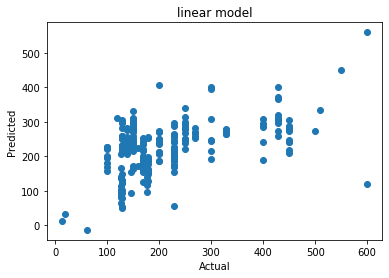

For train set, RMSE is 100.490 and R2 score is 0.360
For test set, RMSE is 93.347 and R2 score is 0.179



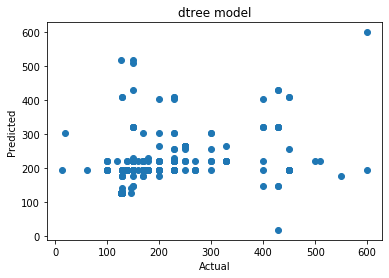

For train set, RMSE is 82.770 and R2 score is 0.566
For test set, RMSE is 107.033 and R2 score is -0.079



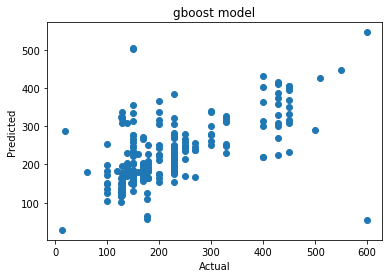

For train set, RMSE is 28.188 and R2 score is 0.950
For test set, RMSE is 83.973 and R2 score is 0.336

SEARCH FOR BEST DEPTH FOR GRADIENT BOOSTING MODEL

Depth:  2
For train set, RMSE is 82.876 and R2 score is 0.564
For test set, RMSE is 92.130 and R2 score is 0.201

Depth:  3
For train set, RMSE is 66.750 and R2 score is 0.717
For test set, RMSE is 90.984 and R2 score is 0.220

Depth:  4
For train set, RMSE is 53.214 and R2 score is 0.820
For test set, RMSE is 85.703 and R2 score is 0.308

Depth:  5
For train set, RMSE is 38.219 and R2 score is 0.907
For test set, RMSE is 83.934 and R2 score is 0.336

Depth:  6
For train set, RMSE is 28.188 and R2 score is 0.950
For test set, RMSE is 83.973 and R2 score is 0.336

Depth:  7
For train set, RMSE is 17.439 and R2 score is 0.981
For test set, RMSE is 85.499 and R2 score is 0.312

Depth:  8
For train set, RMSE is 9.257 and R2 score is 0.995
For test set, RMSE is 84.619 and R2 score is 0.326

Depth:  9
For train set, RMSE is 5.961 and R2 sc

In [1841]:
inputs = df[df['Price']<1000].drop(columns=['Price','Model','Brand','Family'])
response = df[df['Price']<1000]['Price']
calc_model(inputs,response,'linear')
calc_model(inputs,response,'dtree',6)
calc_model(inputs,response,'gboost',6)

print('Search for best depth for gradient boosting model\n'.upper())
for depth in range(2,11):
   print('Depth: ',depth)
   calc_model(inputs,response,'gboost',depth,False)

We can see from applying linear regression, decision tree and gradient boosting model to this data that the prediction model isn't very accurate. The best we're able to get is test set R^2 of 0.336 with a gradient boosting model with depth of 6. Thus, there's a lot of noise in the data that is still unexplained. The best steps to follow next would be to either add additional features to explain some of this noise and/or add in more data to help increase the accuracy of the model